In [ ]:
#Mall Customer Segmentation
# Goal: Identify groups in the data based on Annual Income and Spending Score

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Intel extension for Scikit for faster execution
from sklearnex import patch_sklearn
patch_sklearn()

ImportError: cannot import name 'patch_sklearn' from 'sklearn' (/Users/leenavk/anaconda3/lib/python3.11/site-packages/sklearn/__init__.py)

In [33]:
data = pd.read_csv("unsupervised.csv")

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      150 non-null    float64
 1   f2      150 non-null    float64
 2   f3      150 non-null    float64
 3   f4      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [30]:
data.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


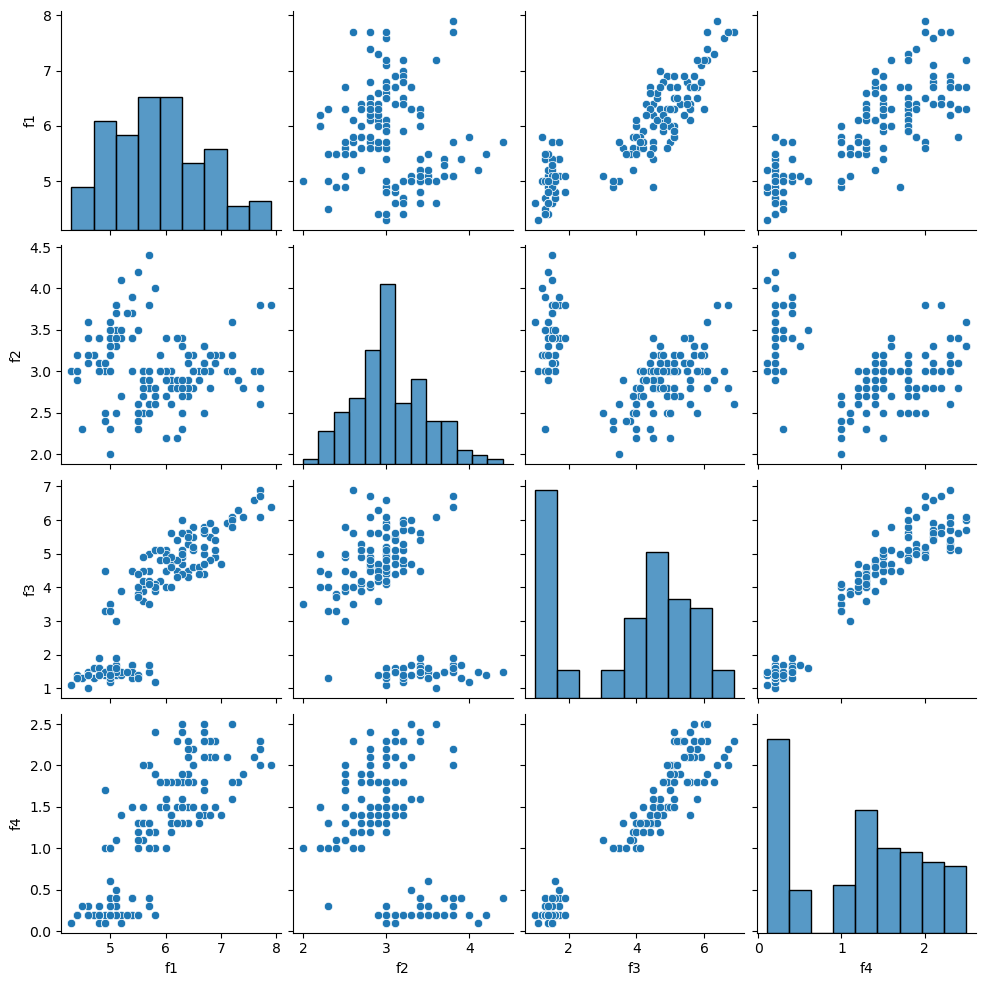

In [24]:
sns.pairplot(data)

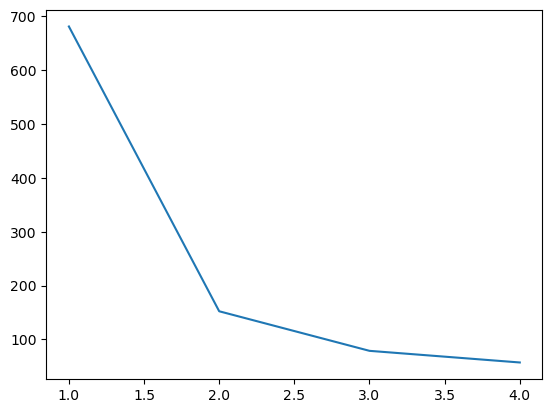

In [11]:
# Identify the ideal value of K in the given dataset

features = data.iloc[:,[0,1,2,3]].values

#
# I can ask the system what shall be the ideal value of K for the given dataset
#
# a. Elbow Method
#
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,5):
  modelToCheckK = KMeans(n_clusters=i)
  modelToCheckK.fit(features)
  wcss.append(modelToCheckK.inertia_)

plt.plot(range(1,5),wcss)

In [12]:
#Model Building

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [13]:
model.fit(features)

KMeans(n_clusters=3)

In [14]:
label = model.predict(features)

In [16]:
finalDataset = data.iloc[:,[0,1,2,3]]
finalDataset['category']=label
finalDataset.tail()
finalDataset['category'].unique()

array([0, 1, 2], dtype=int32)

In [ ]:
# Identify the groups if Age and Spending Score
# k =? using Silhouette Method
# Create Model and Get Labels
# Visualize the groups

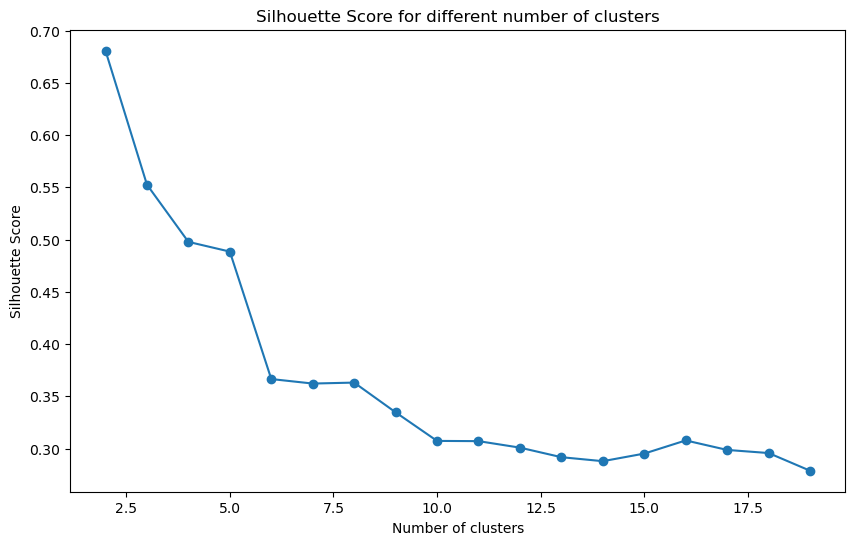

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

# Empty list for silhouette scores
silhouette_scores = []

# Apply KMeans and calculate silhouette scores
# Note: Min K value must be 2
for k in range(2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(range(2,20), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()

In [18]:
# Find the k with the highest silhouette score
optimal_k = range(2,20)[silhouette_scores.index(max(silhouette_scores))]

optimal_k

2